In [65]:
import sys
import operator
import requests
import json
import twitter
import datetime
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
%matplotlib inline
from sqlalchemy import create_engine
my_conn = create_engine("mysql+pymysql://root:""@localhost:3306/test")

In [66]:
import tweepy
import time
import requests
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [67]:
consumer_key = 'EpGEps3HQU0Em9GRQ611680cl'
consumer_secret = 'oBA8gFEqbPhoPHuGWWhkg15IyW5TUjlk3X7a1Kbx39BhBr7lBb'
access_token = '1493363962716508163-qir2LakyYEv8Fxubdhbvj9Q1ORDoVq'
access_secret = 'WjjQEo0f78rSLXDVDdLDjRPGuvD9VnbbRFMxMay3YuBXH'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAABuJZQEAAAAAhcrrEQmNAMxGipN773v2X0b939g%3DZ4R2y26ikjPeFVDmcX6eN73R36xqHJlOvvmKPvrGYd4xQ8zTI3'

In [68]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [69]:
num_tweets = 1000
tweets = []
likes = []
time = []
retweets = []

In [70]:
#Mcdonalds
for t in tweepy.Cursor (api.search_tweets,
                        q= "Mcdonalds -filter:retweets",
                        result_type = ['popular'],
                        lang = 'en',
                        #until = next_day.date(),
                        tweet_mode='extended').items(num_tweets):
    tweets.append(t.full_text)
    likes.append(t.favorite_count)
    time.append(t.created_at)
    retweets.append(t.retweet_count)
    #vs = analyzer.polarity_scores(tweets)
    #scores.append(vs)
    #print("{:-<65} {}".format(tweet, str(vs)))

In [71]:
df = pd.DataFrame({'tweets':tweets, 'likes':likes,'retweets':retweets, 'time':time})

In [72]:
df.sort_values("likes",ascending=False)

,tweets,likes,retweets,time
918,Hey @McDonalds Elon Musk offer still stands! @...,1303,256,2022-05-03 15:00:27+00:00
156,JUST SAW WILL AND SERGIO IN THE MCDONALDS PARK...,72,1,2022-05-03 18:38:49+00:00
186,Man proposes in packed McDonald's and gets bru...,66,24,2022-05-03 18:32:11+00:00
952,"""Oh you don't like when people litter? Well I...",58,3,2022-05-03 14:54:19+00:00
934,The guy that enabled the decimation of Roe is ...,40,10,2022-05-03 14:58:21+00:00
...,...,...,...,...
377,@McDonalds y’all serve sloppy ass Big Macs wtf...,0,0,2022-05-03 17:30:00+00:00
382,McDonald's customer claims they were nearly si...,0,0,2022-05-03 17:28:00+00:00
383,@McDonalds I’ve been trying to reach out. Does...,0,0,2022-05-03 17:27:58+00:00
386,can we go to mcdonalds,0,0,2022-05-03 17:27:15+00:00


In [73]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
scores = []
for tweet in tweets:
    vs = analyzer.polarity_scores(tweet)
    scores.append(vs)
    print("{:-<65} {}".format(tweet, str(vs)))
    if vs['compound'] >= 0.05 :
        print("Positive".format(tweet,str(vs)))
    elif vs['compound'] <= - 0.05 :
        print("Negative".format(tweet,str(vs)))
    else :
        print("Neutral".format(tweet,str(vs)))

Dispatch Headlines 📰 McDonald’s plans to announce further decisions about its operations in Russia and Ukraine by the end of the second quarter. https://t.co/qZAx3waveT {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral
@keepitkye_ lots of variables affect pricing. individual stores set their own prices based on those variables. you can always download our app for the latest deals! {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral
worked at mcdonalds at one point then eventually worked at hot topic with shadow (he was fired from mcdonalds for the constant speeding tickets for door dash deliveries) {'neg': 0.118, 'neu': 0.882, 'pos': 0.0, 'compound': -0.5574}
Negative
Check out McDonalds Toys Walt Disney Classics Aristocats 1994 Sealed 2 Full Sets Cartons  https://t.co/A5DKrcAhgr #eBay via @eBay_UK {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
Neutral
@Elon_whale @McDonalds Did u?------------------------------------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'co

In [74]:
data = pd.DataFrame(scores)
final_dataset= pd.concat([df,data], axis=1)

In [75]:
#if it is positve negative or neutral
final_dataset['sentiment'] = ' '

for x in range(1000):
    if final_dataset.iloc[x,7] < 0:
        final_dataset.iloc[x,8] = 'negative'
    elif final_dataset.iloc[x,7] > 0:
        final_dataset.iloc[x,8] = 'positve'
    else:
        final_dataset.iloc[x,8] = 'neutral'
        
Z=final_dataset.sort_values("likes",ascending=False)

In [76]:
Z=final_dataset.sort_values("likes",ascending=False)

Z.reset_index(inplace=True)

Z

,index,tweets,likes,retweets,time,neg,neu,pos,compound,sentiment
0,918,Hey @McDonalds Elon Musk offer still stands! @...,1303,256,2022-05-03 15:00:27+00:00,0.000,1.000,0.000,0.0000,neutral
1,156,JUST SAW WILL AND SERGIO IN THE MCDONALDS PARK...,72,1,2022-05-03 18:38:49+00:00,0.095,0.905,0.000,-0.2247,negative
2,186,Man proposes in packed McDonald's and gets bru...,66,24,2022-05-03 18:32:11+00:00,0.448,0.552,0.000,-0.8074,negative
3,952,"""Oh you don't like when people litter? Well I...",58,3,2022-05-03 14:54:19+00:00,0.103,0.859,0.038,-0.5676,negative
4,934,The guy that enabled the decimation of Roe is ...,40,10,2022-05-03 14:58:21+00:00,0.000,0.913,0.087,0.3182,positve
...,...,...,...,...,...,...,...,...,...,...
995,377,@McDonalds y’all serve sloppy ass Big Macs wtf...,0,0,2022-05-03 17:30:00+00:00,0.448,0.552,0.000,-0.8074,negative
996,382,McDonald's customer claims they were nearly si...,0,0,2022-05-03 17:28:00+00:00,0.216,0.784,0.000,-0.5106,negative
997,383,@McDonalds I’ve been trying to reach out. Does...,0,0,2022-05-03 17:27:58+00:00,0.154,0.769,0.077,-0.2732,negative
998,386,can we go to mcdonalds,0,0,2022-05-03 17:27:15+00:00,0.000,1.000,0.000,0.0000,neutral


In [77]:
Z.to_sql(con=my_conn,name='mcdonalds',if_exists='replace',index=False)

nltk.download('stopwords')

stop_words = set(nltk.corpus.stopwords.words('english'))

additional_stopwords = ['things', 'stuff', 'sure', 'make', 'think','mcdonalds','mcdonald',"https","co","@"]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
for w in additional_stopwords:

  stop_words.add(w)

import gensim

from gensim.utils import simple_preprocess

In [79]:
word_counts = dict()

for tweet in final_dataset[["tweets", "compound"]].values:

  for token in simple_preprocess(tweet[0]):

    if token not in stop_words:

      if token not in word_counts:

        word_counts[token] = [1, [tweet[1]]]

      else:

        word_counts[token][0] += 1

        word_counts[token][1].append(tweet[1])

In [80]:
for k, v in word_counts.items():

  word_counts[k][1] = np.mean(v[1])

In [81]:
sentiment_df = pd.DataFrame.from_dict(word_counts).transpose().rename({0:'Count', 1:'Sentiment'}, axis=1)

sentiment_df.reset_index(inplace=True)

sentiment_df.rename({'index':'Topic'},axis=1, inplace=True)

Y=sentiment_df.sort_values("Count",ascending=False).reset_index(drop=True)

Y

,Topic,Count,Sentiment
0,like,91.0,0.317265
1,get,69.0,0.032533
2,us,61.0,0.094313
3,one,55.0,0.112835
4,go,49.0,0.070667
...,...,...,...
4180,knife,1.0,-0.296000
4181,gun,1.0,-0.296000
4182,talktv,1.0,-0.051600
4183,irony,1.0,-0.051600


In [82]:
X=Y.head(10).sort_values("Count",ascending=False).reset_index(drop=True)
X

,Topic,Count,Sentiment
0,like,91.0,0.317265
1,get,69.0,0.032533
2,us,61.0,0.094313
3,one,55.0,0.112835
4,go,49.0,0.070667
5,back,47.0,0.043226
6,want,43.0,0.213674
7,people,42.0,0.026169
8,amp,41.0,0.084020
9,elonmusk,41.0,0.366361


In [86]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

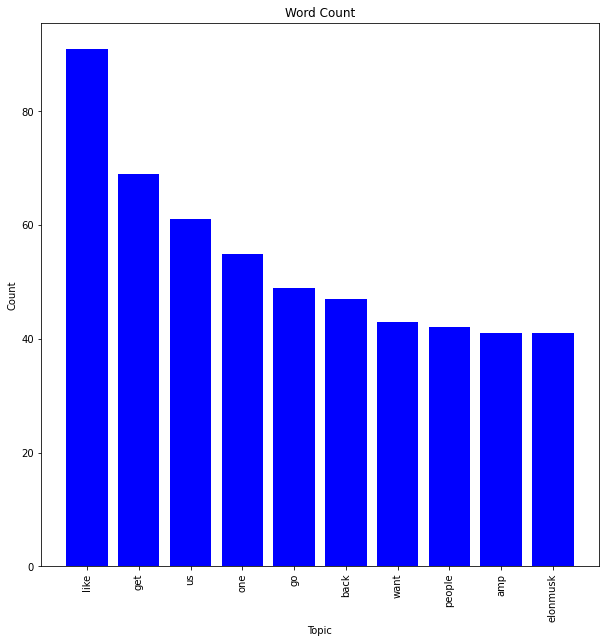

In [91]:
plt.bar("Topic", "Count", data =X, color = "blue")
plt.xlabel("Topic",)
plt.xticks(rotation = 90)
plt.ylabel("Count")
plt.title("Word Count")
plt.show()

Positive


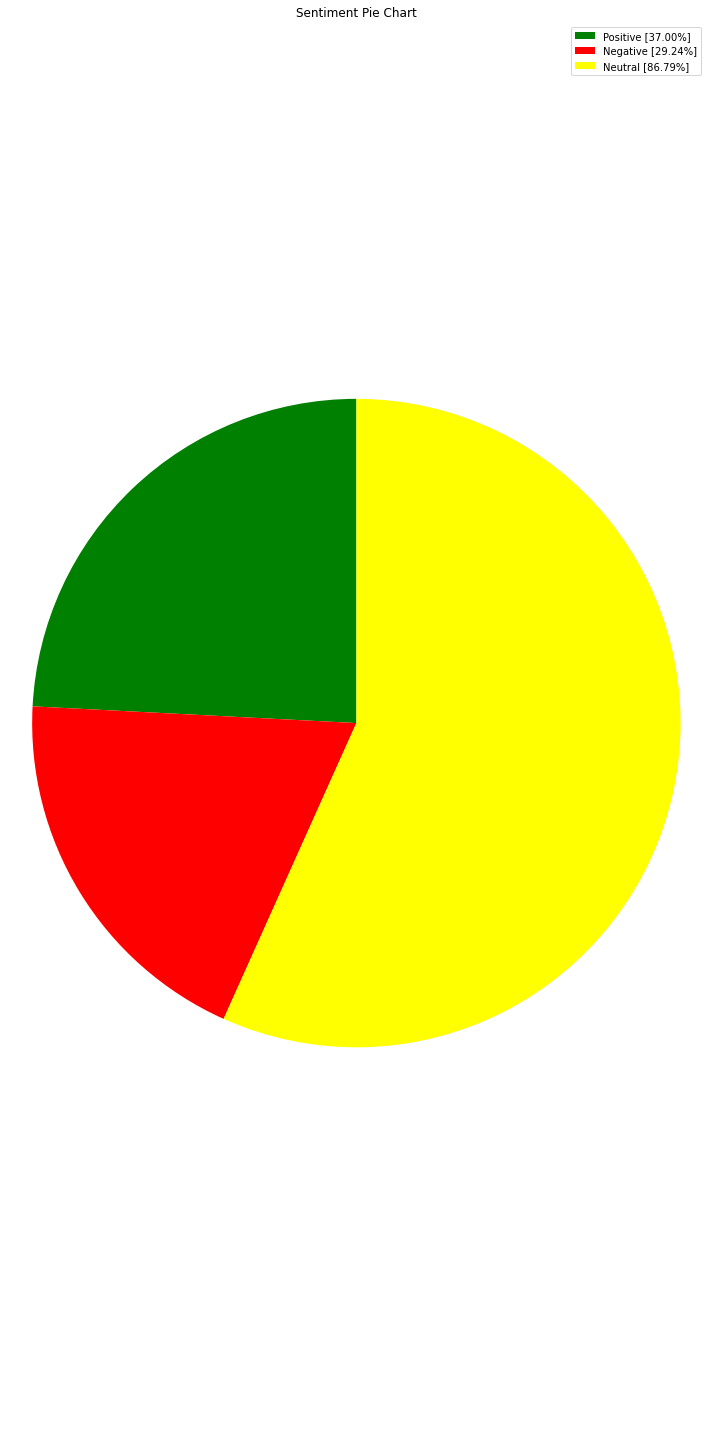

In [85]:
from textblob import TextBlob
import matplotlib.pyplot as plt

def percentage(part,whole):
    return 100*float(part)/float(whole)


positive = 0
negative = 0
neutral = 0
polarity = 0


for tweet in tweets:
    analyzer = TextBlob(tweet)
    polarity += analyzer.sentiment.polarity
    if analyzer.sentiment.polarity > 0:
        positive += 1
    elif analyzer.sentiment.polarity < 0:
        negative += 1
    elif analyzer.sentiment.polarity == 0:
        neutral += 1
positive = percentage(positive,(positive + negative + neutral))
negative = percentage(negative,(positive + negative + neutral))
neutral = percentage(neutral,(positive + negative + neutral))

positive = format(positive,'.2f')
negative = format(negative,'.2f')
neutral = format(neutral,'.2f')

if (polarity > 0):
    print("Positive")
elif (polarity < 0):
    print("Negative")
elif (polarity == 0):
    print("Neutral")

labels = ['Positive ['+str(positive)+'%]', 'Negative ['+str(negative)+'%]', 
'Neutral ['+str(neutral)+'%]']
sizes = [positive, negative, neutral]
colors = ['green','red','yellow']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("Sentiment Pie Chart")
plt.axis('equal')
plt.tight_layout()
plt.show()